In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from scipy.stats.kde import gaussian_kde
from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.datasets import make_moons
from sklearn import decomposition
from sklearn.cluster import DBSCAN,Birch,KMeans,estimate_bandwidth,MeanShift

np.set_printoptions(suppress=True)

In [2]:
data=pd.read_excel("../数据/1.xlsx")
data

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,1,1,1,1,1,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,2,2,2,2,2,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,2,1,1,1,3,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,3,2,1,1,1,4,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,4,2,1,1,1,5,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54,1,2,2,2,65,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,55,1,2,9,1,66,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,56,1,2,1,2,67,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,57,1,2,1,2,68,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [3]:
df=data.iloc[:,6:]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


主成分系数 [[-0.77600584 -0.00721228 -0.05790607  0.0036315  -0.0014684  -0.0292596
  -0.00612707  0.01001155  0.60337628  0.15769002  0.06250004  0.00607474
  -0.00124     0.022952  ]
 [-0.43733607  0.01465405  0.11795546  0.04883913 -0.00165655  0.04079968
   0.0124782   0.13684412 -0.69502832  0.51448422  0.03279928 -0.00049095
  -0.00000178  0.15112871]]
[1 2]
[1 2 3]


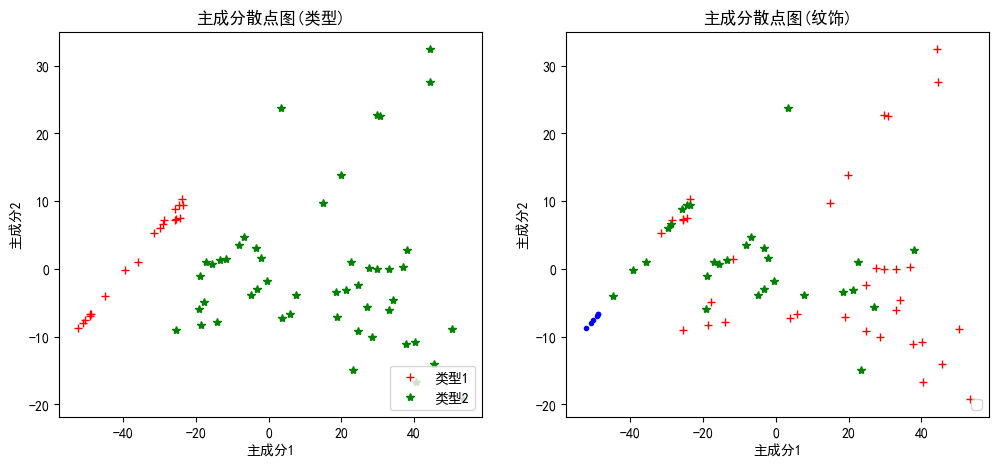

In [4]:
# logX=df.apply(lambda x:1/(1+np.exp(x)))
pca =decomposition.PCA(n_components=2)
pca.fit(df)
print('主成分系数',pca.components_)
Xtmp = pca.fit_transform(df)
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
channels=np.unique(data['类型'])
print(channels)
# regions=np.unique(data['表面风化'])
regions=np.unique(data['纹饰'])
print(regions)
# regions=np.unique(data['表面风化'])
markers=['+','*','.']
colors=['r','g','b','y']
for channel in channels:
    axes[0].plot(Xtmp[data['类型']==channel,0],Xtmp[data['类型']==channel,1],colors[channel-1]+markers[channel-1],
                 label='类型'+str(channel))
axes[0].set_title("主成分散点图(类型)")
axes[0].set_xlabel("主成分1")
axes[0].set_ylabel("主成分2")
axes[0].legend(loc='lower right')
axes[1].set_title("主成分散点图(纹饰)")
axes[1].set_xlabel("主成分1")
axes[1].set_ylabel("主成分2")
axes[1].legend(loc='lower right')
for region in regions:
    axes[1].plot(Xtmp[data['纹饰']==region,0],Xtmp[data['纹饰']==region,1],colors[region-1]+markers[region-1],
                 label='纹饰'+str(region))

Text(0, 0.5, '主成分2')

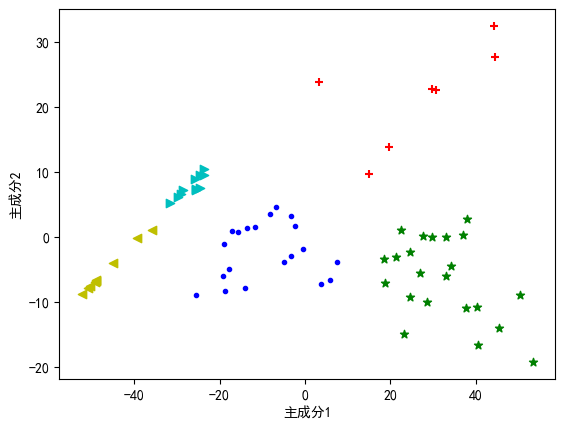

In [5]:
import time
# start1 = time.clock()
import datetime
start_time = datetime.datetime.now()  # 程序开始时间
#bandwidth = estimate_bandwidth(logX,quantile=0.1,random_state=1)
MS = MeanShift(bandwidth=5, bin_seeding=True)  #file为两类
# MS.fit(logX)
MS.fit(df)
# end1 = time.clock()
over_time = datetime.datetime.now()   # 程序结束时间
total_time = (over_time-start_time).total_seconds()

labels1=np.unique(MS.labels_)

# start2=time.clock()
Bi=Birch(n_clusters=5)  #默认采用系统聚类
Bi.fit(df)
# Bi.fit(logX)
# end2 = time.clock()

# total_time = (over_time-start_time).total_seconds()
# print('程序共计%s秒' % total_time)
labels2=np.unique(Bi.labels_)

# fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
markers=['*','+','.','<','>','v','s']
colors=['g','r','b','y','c','m','k']


for k, col,m in zip(range(len(labels2)), colors,markers):
    plt.scatter(Xtmp[Bi.labels_ == k, 0], Xtmp[Bi.labels_ == k,1],c=col,marker=m)
# axes[1].set_title("BIRCH聚类解(运行时间:%.3f秒)"%(end2-start2))
plt.xlabel("主成分1")
plt.ylabel("主成分2")
